In [1]:
import cv2
from skimage import io, color, filters, util
from skimage.transform import rescale
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack as fp

# Soal 1

Terdapat suatu gambar tools.jpg yang terdiri dari beberapa peralatan yang berbeda. Lakukan
pengolahan citra tersebut dalam citra grayscale.

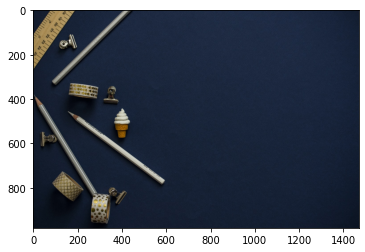

In [2]:
tools = io.imread('tools.jpg')
plt.imshow(tools,cmap='gray')
plt.show()

### a. Lakukan Simple Global Thresholding pada citra tersebut

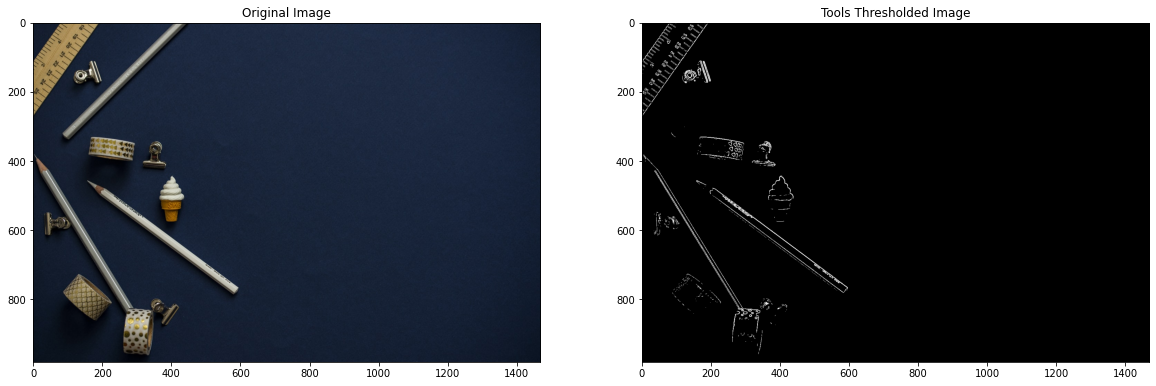

In [3]:
import cv2

gray_tools = color.rgb2gray(tools)
tools2 = util.img_as_ubyte(filters.prewitt(gray_tools))
_, tools_threshold = cv2.threshold(tools2, 50, 255,
cv2.THRESH_BINARY)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1) ,plt.imshow(tools)
plt.title('Original Image')
plt.subplot(1,2,2),plt.imshow(tools_threshold,cmap = 'gray')
plt.title('Tools Thresholded Image')
plt.show()

### b. Lakukan Otsu’s Thresholding (beserta histogramnya) pada citra tersebut

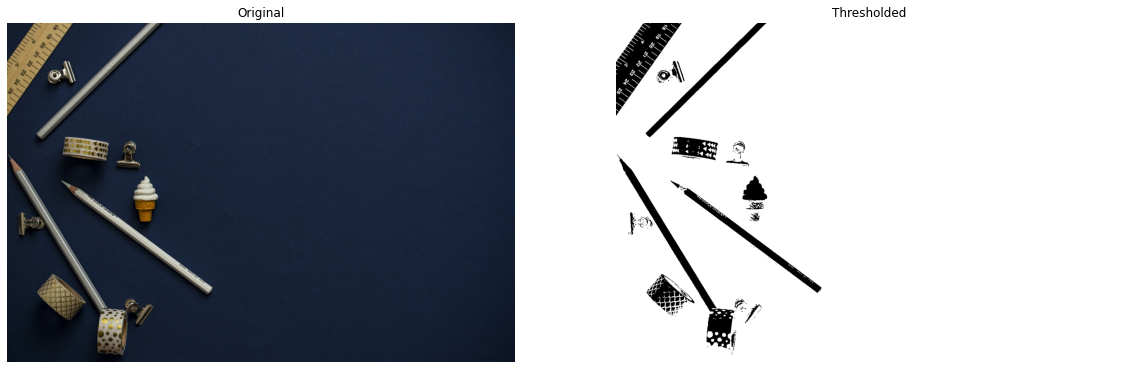

In [4]:
G = util.img_as_ubyte(color.rgb2gray(tools))
T = filters.threshold_otsu(G)
S = util.img_as_float(G > T)

        
plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(tools)
plt.title('Original'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(1-S, cmap='gray')
plt.title("Thresholded"); plt.axis("off")
plt.show()

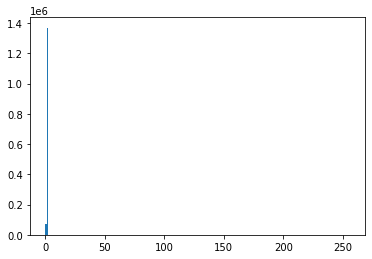

In [5]:
plt.hist(1-S.flatten(), 256, range=(0,256))
plt.show()

### c. Jelaskan perbedaan hasil dari simple global thresholding pada (a) dan Otsu’s Thresholding pada (b) dan alasan mengapa perbedaan tersebut bisa terjadi.

> Terlihat pada gambar tersebut terdapat perbedaan jumlah tools yang dihasilkan dari kedua metode. Simple global thresholding menghasilkan 11 tools dan Otsu’s Thresholding menghasilkan 12 tools. Hal tersebut dapat terjadi karena simple global thresholding hanya menghasilkan edge yang penting (intensitas tinggi) sehingga menghasilkan 11 tools saja. Sedangkan metode Otsu’s Thresholding menemukan nilai threshold yang ideal untuk meminimalkan varian dalam kelas dan memaksimalkan varian antar kelas sehingga menghasilkan 12 tools sesuai dengan citra asli.

### d. Tentukan metode mana yang lebih optimal untuk citra ini dan mengapa?

> Pada citra ini, metode Otsu’s Thresholding  yang lebih optimal. Hal itu dikarenakan pada metode ini meminimalkan varian dalam kelas dan memaksimalkan varian antar kelas tanpa menghilangkan komponen2 penting yang ada(yaitu tools) sehingga hasil citra tersebut masih  menghasilkan 12 tools sesuai dengan citra asli.

# Soal 2

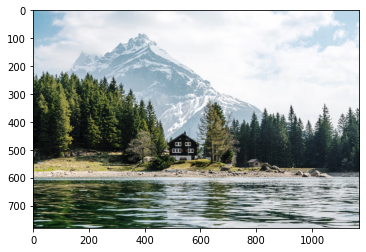

In [6]:
mountain = io.imread('mountain.jpg')
plt.imshow(mountain,cmap='gray')
plt.show()

### a. Gunakan algoritma SLIC untuk melakukan segmentasi, lakukan percobaan untuk 10, 50, dan 100 segmen.

c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  del sys.path[0]


SLIC number of segments:7


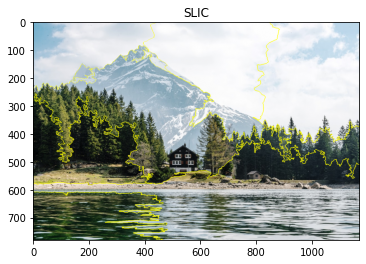

SLIC number of segments:33


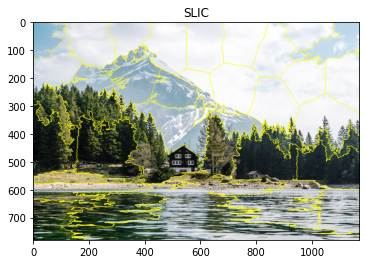

SLIC number of segments:62


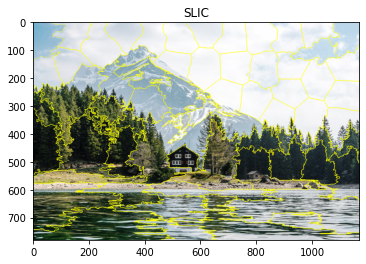

In [7]:
from skimage.segmentation import slic
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import numpy as np

mountain_gray = util.img_as_ubyte(color.rgb2gray(mountain))
segments = [10,50,100]

for i in segments :
    segments_slic = slic(mountain, n_segments=i, compactness=10,sigma=1)
    print(f"SLIC number of segments:{len(np.unique(segments_slic))}")
    plt.imshow(mark_boundaries(mountain, segments_slic))
    plt.title('SLIC')
    plt.show()

### b. Apa yang dapat disimpulkan dari percobaan pada (a)? Apakah pengaruh berbagai jumlah segmen terhadap hasil segmentasi? Jumlah segmen berapa yang menurut Anda memberikan hasil paling baik pada citra ini? Berikan penjelasannya.

Dari percobaan a terlihat terdapat segmentasi sesuai dengan jumlah segmen yang kita input dari algoritma SLIC . Pengaruh berbagai jumlah segmen terhadap segmentasi adalah  membagi suatu citra menjadi wilayah-wilayah yang
homogen berdasarkan kemiripan region tertentu antara suatu piksel dengan piksel — piksel tetangganya dimana pembagiaan kemiripan tersebut berdasarkan jumlah segmen yang diinput dan jumlah segmen tersebut perlu kita sesuaikan agar menghasilkan cluster hasil segmentasi yang baik.Menurut saya berdasarkan perbandingan outout diatas, jumlah segmen yang baik adalah 100. Terlihat bahwa pada segment tersebut  memberikan detail yang bagus untuk pembagian wilayahnya. Contohnya terlihat bahwa pada output tersebut terdapat perbedaan region antara rumah dan pohon

### c. Setelah memilih jumlah segmen yang paling baik pada soal 2b, visualisasikan citra dalam bentuk penyeragaman piksel untuk setiap superpiksel yang telah disegmentasi. Gunakan nilai median untuk memilih piksel yang dipilih untuk setiap superpiksel.

In [8]:
segments_slic = slic(mountain, n_segments=100, compactness=10,sigma=1)
print(f"SLIC number of segments:{len(np.unique(segments_slic))}")

c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  """Entry point for launching an IPython kernel.


SLIC number of segments:62


(-0.5, 1169.5, 779.5, -0.5)

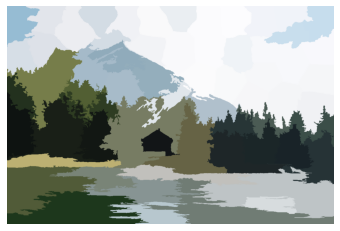

In [9]:
def superpixel_median_image(image, slic_labels):
    im_rp=image.reshape((image.shape[0]*image.shape[1],image.shape[2]))
    sli_1d=np.reshape(slic_labels,-1)
    uni=np.unique(sli_1d)
    new_img=np.zeros(im_rp.shape)
    
    for i in uni:
        loc=np.where(sli_1d==i)[0]
        #print(loc)
        mm=np.median(im_rp[loc,:],axis=0)
        new_img[loc,:]=mm
    return np.reshape(new_img,[image.shape[0],image.shape[1],image.shape[2]]).astype('uint8')

superpixel_image3 = superpixel_median_image(mountain, segments_slic)
plt.imshow(superpixel_image3)
plt.axis('off')